# Applications and Properties of 2D Fourier Transform
The Fourier Transform (FT) of a signal gives the spatial frequency distribution of that signal – a sort of histogram of spatial frequencies which make up the signal. Unlike ordinary histograms, however, FTs are 
reversible, meaning you can recover the original image from the FT by using inverse FT. In this activity, we will explore more properties and applications of the Fourier Transform.

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import stats

plt.rcParams["figure.figsize"] = (4,4)
# plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 300

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def aperture_fft(aperture_shape):
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(aperture_shape, cmap = "gray")
    ax[0].set_title("Aperture")
    ax[0].axis("off")
    
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    ax[1].imshow(fftshift_aperture, cmap = "hot")
    ax[1].set_title("FFT")
    ax[1].axis("off")
    
    ax[2].imshow(np.log(fftshift_aperture), cmap = "hot")
    ax[2].set_title("FFT in log scale")
    ax[2].axis("off")

## Activity 3.1 - Rotation Property of the FT

In [3]:
def sinusoid(freq, angle, resolution):
    x = np.linspace(-1, 1, resolution)
    X, Y = np.meshgrid(x, x)
    grating = np.sin(2*np.pi*freq*(X*np.cos(angle) + Y*np.sin(angle)))
    return grating

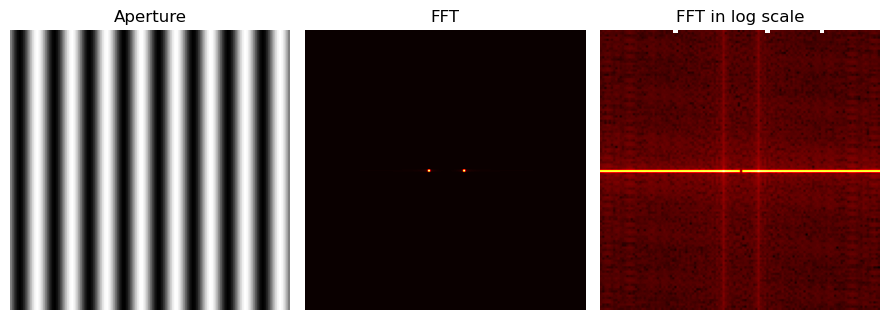

In [4]:
aperture_fft(sinusoid(4, np.pi, 128))
plt.savefig("sinusoid 0.png", bbox_inches = 'tight', pad_inches = 0.1)

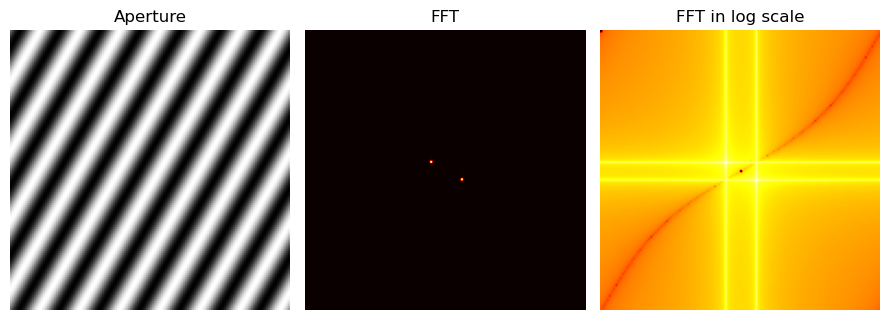

In [5]:
aperture_fft(sinusoid(4, np.pi/6, 128))
plt.savefig("sinusoid 5pi6.png", bbox_inches = 'tight', pad_inches = 0.1)

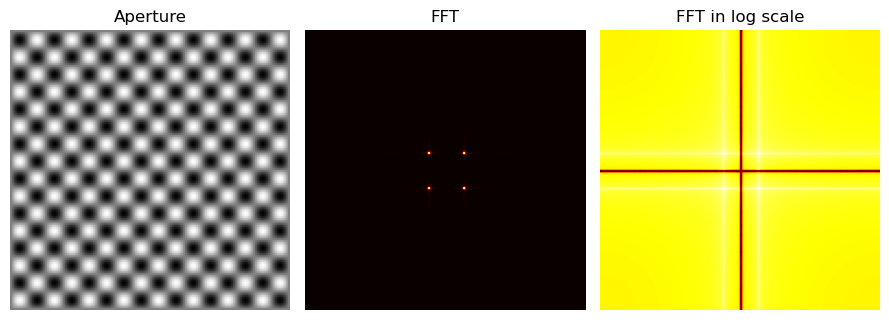

In [6]:
aperture_fft(sinusoid(4, np.pi, 128)*sinusoid(4, np.pi/2, 128))
plt.savefig("sinusoid combination 1.png", bbox_inches = 'tight', pad_inches = 0.1)

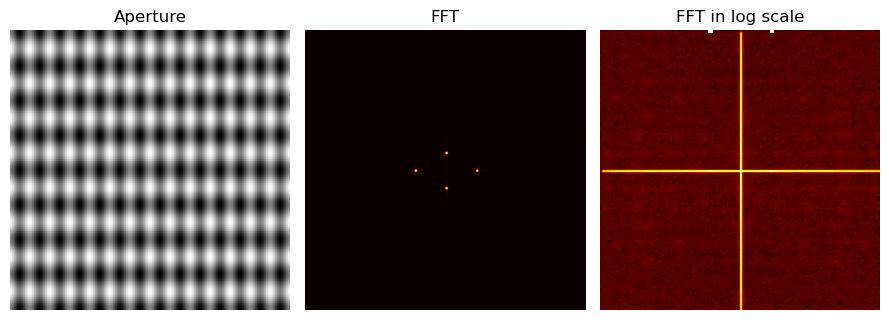

In [7]:
aperture_fft(sinusoid(4, np.pi/6, 128)*sinusoid(4, 5*np.pi/6, 128))
plt.savefig("sinusoid combination 2.png", bbox_inches = 'tight', pad_inches = 0.1)

In [8]:
def sinusoid_fft_comparison(aperture_shape):
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    return fftshift_aperture, np.log(fftshift_aperture)

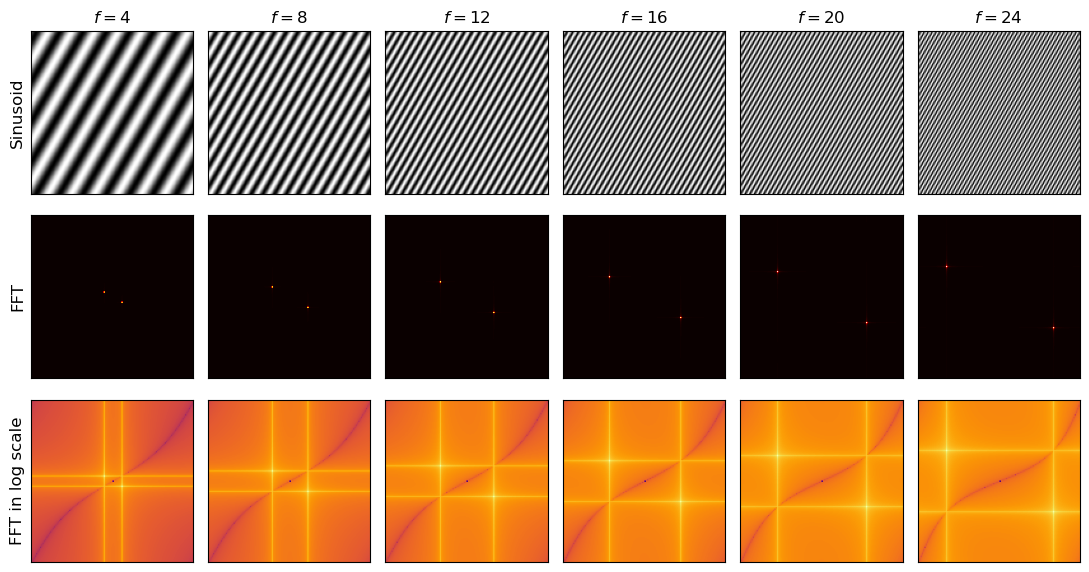

In [9]:
frequencies = [4, 8, 12, 16, 20, 24]
resolution = 128
angle = np.pi/6

fig, ax = plt.subplots(3, len(frequencies), figsize = (11, 6), tight_layout = True)
for i, f in enumerate(frequencies):
    ax[0,i].imshow(sinusoid(f, angle, resolution), cmap = "gray")
    ax[0,i].set_title("$f = {}$".format(f))
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(f, angle, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(f, angle, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)
    
fig.savefig("sinusoid varying freq.png", bbox_inches = 'tight', pad_inches = 0.1)

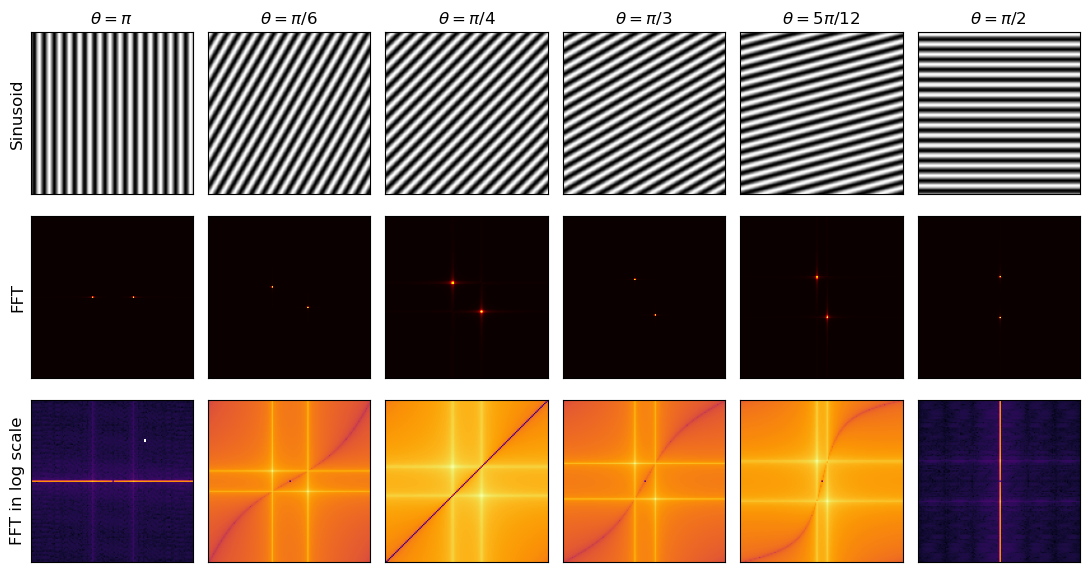

In [10]:
rotation_xaxis = [np.pi, np.pi/6, np.pi/4, np.pi/3, 5*np.pi/12, np.pi/2]
plot_title = [r"$\theta = \pi$", r"$\theta = \pi/6$", r"$\theta = \pi/4$", r"$\theta = \pi/3$", 
              r"$\theta = 5\pi/12$", r"$\theta = \pi/2$"]
resolution = 128
frequency = 8

fig, ax = plt.subplots(3, len(rotation_xaxis), figsize = (11, 6), tight_layout = True)
for (i, theta), title in zip(enumerate(rotation_xaxis), plot_title):
    ax[0,i].imshow(sinusoid(frequency, theta, resolution), cmap = "gray")
    ax[0,i].set_title(r"{}".format(title))
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, theta, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, theta, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)
    
fig.savefig("sinusoid varying theta.png", bbox_inches = 'tight', pad_inches = 0.1)

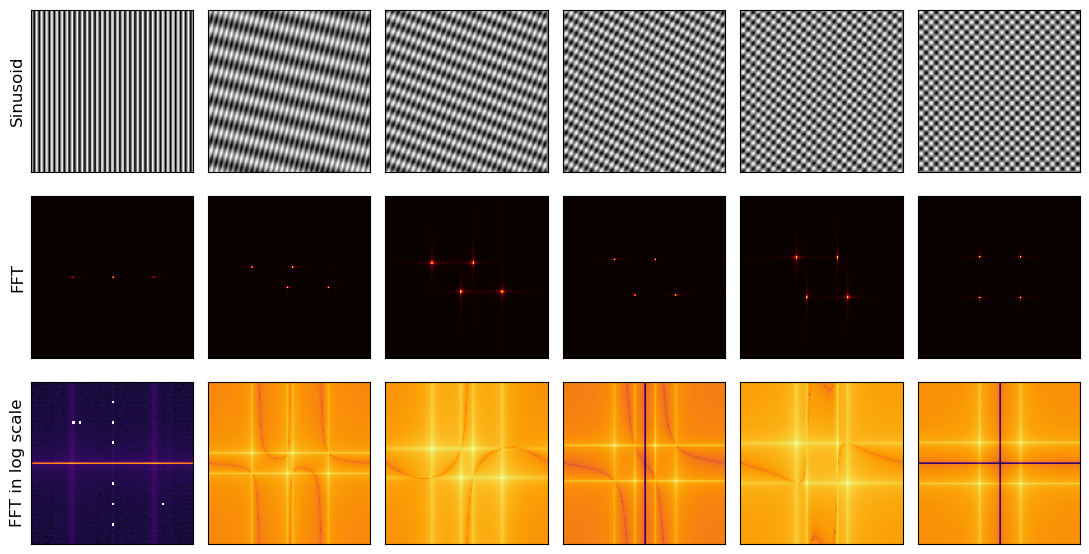

In [11]:
offset_angle = [np.pi, np.pi/6, np.pi/4, np.pi/3, 5*np.pi/12, np.pi/2]
resolution = 128
frequency = 8

fig, ax = plt.subplots(3, len(rotation_xaxis), figsize = (11, 6), tight_layout = True)
for i, theta in enumerate(offset_angle):
    ax[0,i].imshow(sinusoid(frequency, 0, resolution)*sinusoid(frequency, theta, resolution), cmap = "gray")
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, 0, resolution)*
                   sinusoid(frequency, theta, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, 0, resolution)*
                   sinusoid(frequency, theta, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)
    
fig.savefig("sinusoid varying combi.png", bbox_inches = 'tight', pad_inches = 0.1)

***
## Activity 2 - Canvas Weave Modeling and Removal

Unwanted repetitive patterns in an image can be removed by masking their frequencies in the Fourier domain. Alternatively, desired frequencies in the image may also be enhanced. We can create filter masks to block out unwanted frequencies. In creating a filter mask, careful consideration of the convolution theorem is necessary. Remember that:
1. The FT of a convolution of two functions f and g in space is the product of the two functions' FT F and G, i.e., $ f*g = FG $.
2. The convolution of a dirac delta at $x_0, y_0$ and a function $f(x,y)$ results in a replication of $f(x,y)$ in the location of the dirac delta, i.e., $$ \int_{-\infty}^{\infty} \delta \left( x-x_0-x', y-y_0-y' \right) f(x',y') dx'dy' = f(x-x_0, y-y_0) $$

In [15]:
orig_painting = Image.open("painting by daria.png")
grayscale_painting = np.array(orig_painting.convert("L"))
mean_grayscale = grayscale_painting - np.mean(grayscale_painting)

unfiltered_FFT = np.log(abs(fft.fftshift(fft.fft2(mean_grayscale))))
plt.imsave("unfiltered mask.png", unfiltered_FFT, cmap = "turbo_r")
unfiltered_FFT.shape

(960, 1280)

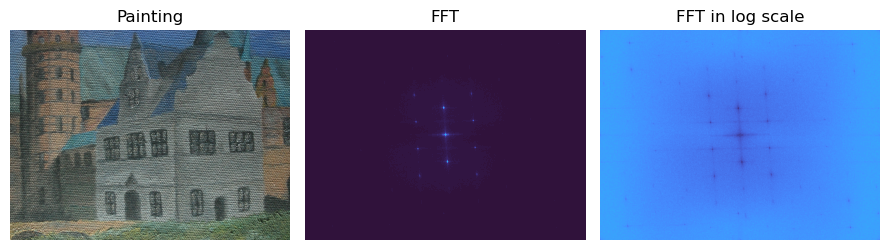

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (9, 4), tight_layout = True)
ax[0].imshow(orig_painting, cmap = "gray")
ax[0].set_title("Painting")
ax[1].imshow(abs(fft.fftshift(fft.fft2(mean_grayscale))), cmap = "turbo")
ax[1].set_title("FFT")
ax[2].imshow(np.log(abs(fft.fftshift(fft.fft2(mean_grayscale)))), cmap = "turbo_r")
ax[2].set_title("FFT in log scale")

for a in ax:
    a.axis("off")

fig.savefig("painting fft orig.png", bbox_inches = 'tight', pad_inches = 0.1)

We can manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is **all ones** but are **zeros** at the locations of the sinusoidal peaks.

In [14]:
filtered_mask = Image.open("filtered mask.png")
filtered_mask = np.array(filtered_mask.convert("L"))
plt.imshow(masked_filter, cmap = "gray")
plt.imsave("filtered mask.png", masked_filter, cmap = "gray")
plt.title("Filtered mask")

NameError: name 'masked_filter' is not defined

FFT shift this filter and multiply this to the complex FT of the red, green and blue channels of the original image (not mean subtracted). The filter essentially erases the peaks. Take the inverse FT of the filtered FT and overlay the filtered red, green, and blue image channels. 

In [ ]:
orig_painting = np.array(Image.open("painting by daria.png"))
img = orig_painting

Rd, Gn, Bl = img[:,:,0], img[:,:,1], img[:,:,2]
channels = [Rd, Gn, Bl]
titles = ["Red channel", "Green channel", "Blue channel"]

fig, ax = plt.subplots(2, 3, figsize = (12, 6), tight_layout = True)
for i in range(len(channels)):
    ax[0,i].imshow(channels[i], cmap = "gray")
    ax[0,i].set_title(titles[i])
    ax[0,i].axis("off")
    ax[1,i].imshow(np.log(abs(fft.fftshift(fft.fft2(channels[i])))), cmap = "gray")
    ax[1,i].axis("off")
    
fig.savefig("rgb channels.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
def canvas_deweave(img, mask_img): # img and mask_img must be in array type
    fftshift_mask = fft.fftshift(mask_img)
    fftRd = fftshift_mask * fft.fft2(img[:,:,0])
    fftGn = fftshift_mask * fft.fft2(img[:,:,1])
    fftBl = fftshift_mask * fft.fft2(img[:,:,2])
    ifftRd = fft.ifft2(fftRd)
    ifftGn = fft.ifft2(fftGn)
    ifftBl = fft.ifft2(fftBl)
    
    # Remapping the values from 0 to 255 for RGB
    filtered_img = abs(np.dstack((ifftRd, ifftGn, ifftBl)))
    filtered_img = filtered_img / filtered_img.max()
    filtered_img *= 255
    filtered_img = filtered_img.astype(np.uint8)
    
    return filtered_img

Adapting the gray world algorithm implemented on the previous [activities](https://github.com/npcrmns/App-Physics-157/blob/main/%5B1%5D%20Digital%20Image%20Formation%20and%20Enhancement/Digital%20Image%20Formation%20and%20Enhancement.ipynb) to enhance the color of the resulting image,

In [ ]:
def white_balance(img): # img must be in array type
    Rd, Gn, Bl = img[:,:,0], img[:,:,1], img[:,:,2]
    Rdave, Gnave, Blave = np.average(Rd), np.average(Gn), np.average(Bl)
    RdWB, GnWB, BlWB = Rd/Rdave, Gn/Gnave, Bl/Blave
    
    # Remapping the values from 0 to 255 for RGB
    RGB_GWArestored = np.dstack((RdWB, GnWB, BlWB))
    RGB_GWArestored = RGB_GWArestored/RGB_GWArestored.max()
    RGB_GWArestored *= 255
    RGB_GWArestored = RGB_GWArestored.astype(np.uint8)
    
    return RGB_GWArestored

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (11, 6), tight_layout = True)
ax[0].imshow(orig_painting, cmap = "gray")
ax[0].set_title("Original painting")
ax[1].imshow(canvas_deweave(orig_painting, filtered_mask))
ax[1].set_title("Deweaved painting")
ax[2].imshow(white_balance(canvas_deweave(orig_painting, filtered_mask)))
ax[2].set_title("Color enhanced painting")

for a in ax:
    a.axis("off")
    
plt.imsave("deweaved painting.png", canvas_deweave(orig_painting, filtered_mask))
plt.imsave("color enhanced painting.png", white_balance(canvas_deweave(orig_painting, filtered_mask)))

In [ ]:
weaved_pattern = canvas_deweave(orig_painting, filtered_mask) - orig_painting
plt.imsave("weaved patterns.png", weaved_pattern, cmap = "gray")

fig, ax = plt.subplots(1, 2, figsize = (9, 4), tight_layout = True)
ax[0].imshow(filtered_mask, cmap = "gray")
ax[0].set_title("Masked filter")
ax[1].imshow(weaved_pattern)
ax[1].set_title("Weaved pattern")

for a in ax:
    a.axis("off")